In [62]:
%load_ext autoreload
%autoreload 2

import torch
import re
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

from wordcloud import WordCloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import operator 
from tqdm import tqdm
tqdm.pandas()

# Count word in the dataset
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [235]:
df_train = pd.read_csv("../data/raw/train.csv")

<AxesSubplot:title={'center':'Sentiment distribution'}>

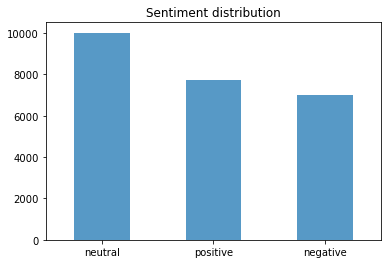

In [236]:
df_train['sentiment'].value_counts().plot(kind='bar', rot=0, alpha=0.75, title="Sentiment distribution")

# Analyze text and words

In [237]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
# stopwords.words('english')

In [238]:
df_train_pos = df_train.loc[df_train['sentiment'] == 'positive']
df_train_neg = df_train.loc[df_train['sentiment'] == 'negative']
df_train_neu = df_train.loc[df_train['sentiment'] == 'neutral']

## Get common words

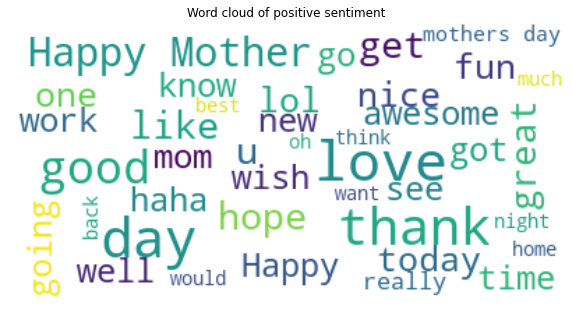

In [239]:
text_pos = ' '.join(word for word in df_train_pos['text']) # Join all row into 1 big text
wordcloud = WordCloud(stopwords=stopwords.words('english'), max_font_size=40, max_words=40, background_color='white').generate(text_pos)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word cloud of positive sentiment')
plt.show()

In [240]:
# Words count
sorted(WordCloud(stopwords=stopwords.words('english')).process_text(text_pos).items(), key=lambda x: x[1], reverse=True)[:20]

[('love', 819),
 ('day', 759),
 ('thank', 681),
 ('good', 543),
 ('Happy Mother', 401),
 ('get', 352),
 ('u', 347),
 ('like', 346),
 ('hope', 345),
 ('great', 331),
 ('nice', 303),
 ('lol', 295),
 ('one', 290),
 ('today', 288),
 ('fun', 285),
 ('Happy', 263),
 ('work', 257),
 ('mom', 252),
 ('awesome', 251),
 ('going', 245)]

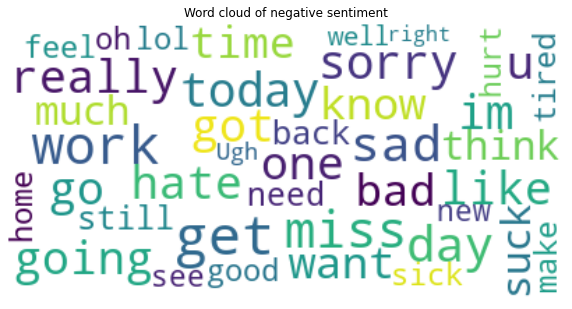

In [241]:
text_neg = ' '.join(word for word in df_train_neg['text']) # Join all row into 1 big text
wordcloud = WordCloud(stopwords=stopwords.words('english'), max_font_size=40, max_words=40, background_color='white').generate(text_neg)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word cloud of negative sentiment')
plt.show()

In [243]:
sorted(WordCloud(stopwords=stopwords.words('english')).process_text(text_neg).items(), key=lambda x: x[1], reverse=True)[:20]

[('get', 402),
 ('work', 371),
 ('miss', 354),
 ('sad', 344),
 ('day', 334),
 ('im', 315),
 ('sorry', 308),
 ('today', 304),
 ('going', 284),
 ('like', 277),
 ('hate', 273),
 ('go', 266),
 ('really', 265),
 ('got', 263),
 ('one', 258),
 ('u', 251),
 ('know', 240),
 ('want', 234),
 ('bad', 230),
 ('time', 215)]

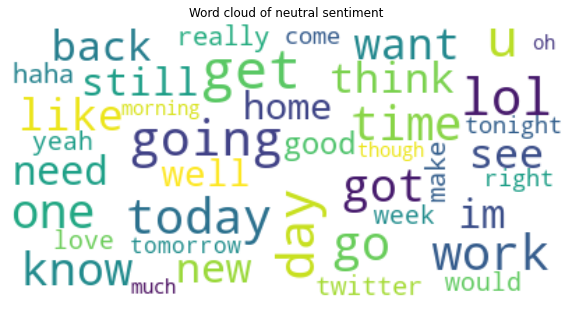

In [244]:
text_neu = ' '.join(word for word in df_train_neu['text']) # Join all row into 1 big text
wordcloud = WordCloud(stopwords=stopwords.words('english') ,max_font_size=40, max_words=40, background_color='white').generate(text_neu)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word cloud of neutral sentiment')
plt.show()

In [245]:
sorted(WordCloud(stopwords=stopwords.words('english')).process_text(text_neu).items(), key=lambda x: x[1], reverse=True)[:20]

[('get', 542),
 ('day', 466),
 ('lol', 455),
 ('u', 443),
 ('going', 425),
 ('go', 410),
 ('work', 409),
 ('today', 401),
 ('time', 382),
 ('one', 381),
 ('got', 368),
 ('know', 364),
 ('like', 322),
 ('want', 320),
 ('back', 297),
 ('new', 291),
 ('see', 284),
 ('think', 282),
 ('need', 265),
 ('im', 261)]

# Analyze symbol

In [246]:
# import string

# normal_word = r"(?:\w[\w']+)"
# # 2+ consecutive punctuations, e.x. :)
# ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# # a single character that is not alpha_numeric or other ascii printable
# emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
# regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
#                                                      emoji=emoji)

# asci_emoji = r"{ascii_art}|{emoji}".format(ascii_art=ascii_art, emoji=emoji)

In [247]:
import emot

emot_obj = emot.core.emot() 

# get and count emoji from corpus
def build_vocab_emoji(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        # get emoticons and emoji
        emojis = emot_obj.emoticons(sentence)['value']
        if len(emojis) != 0:
            for emoji in emojis:
                try:
                    vocab[emoji] += 1
                except KeyError:
                    vocab[emoji] = 1
    return vocab

In [251]:
vocab_emoji = build_vocab_emoji(df_train_pos["text"])
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|███████████████████████████████████████████████████████████████████████████| 7711/7711 [00:00<00:00, 179508.79it/s]


[(':/', 376),
 (';)', 64),
 (':3', 15),
 ('XD', 9),
 (';D', 8),
 (':]', 8),
 ('oO', 6),
 ('=D', 5),
 (':|', 5),
 ('d:', 4)]

In [250]:
vocab_emoji = build_vocab_emoji(df_train_neg["text"])
vocab_emoji
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|███████████████████████████████████████████████████████████████████████████| 7003/7003 [00:00<00:00, 140688.73it/s]


[(':/', 231),
 (':3', 18),
 (';)', 15),
 (':S', 12),
 (':@', 12),
 ('D:', 10),
 ('d:', 9),
 (':|', 7),
 ('XD', 6),
 ('=/', 4)]

In [253]:
vocab_emoji = build_vocab_emoji(df_train_neu["text"])
vocab_emoji
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|█████████████████████████████████████████████████████████████████████████| 10018/10018 [00:00<00:00, 148210.40it/s]


[(':/', 544),
 (';)', 41),
 (':3', 20),
 (':O', 12),
 (':]', 9),
 ('XD', 8),
 (':S', 7),
 ('D:', 7),
 ('0:3', 4),
 (':|', 4)]

# Remove time and url

In [254]:
# Remove time and url
from src.features.preprocess import remove_url, remove_time

df_train["text"] = df_train["text"].progress_apply(lambda x: remove_url(x))
df_train["text"] = df_train["text"].progress_apply(lambda x: remove_time(x))

100%|█████████████████████████████████████████████████████████████████████████| 24732/24732 [00:00<00:00, 291226.79it/s]


In [255]:
df_train_pos = df_train.loc[df_train['sentiment'] == 'positive']
df_train_neg = df_train.loc[df_train['sentiment'] == 'negative']
df_train_neu = df_train.loc[df_train['sentiment'] == 'neutral']

In [256]:
vocab_emoji = build_vocab_emoji(df_train_pos["text"])
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|███████████████████████████████████████████████████████████████████████████| 7711/7711 [00:00<00:00, 216919.60it/s]


[(';)', 64),
 ('XD', 9),
 (';D', 8),
 (':]', 8),
 ('oO', 6),
 ('=D', 5),
 (':|', 5),
 ('d:', 4),
 (':o', 4),
 (':/', 4)]

In [257]:
vocab_emoji = build_vocab_emoji(df_train_neg["text"])
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|███████████████████████████████████████████████████████████████████████████| 7003/7003 [00:00<00:00, 252838.13it/s]


[(':/', 17),
 (';)', 15),
 (':S', 12),
 (':@', 12),
 ('D:', 10),
 ('d:', 9),
 (':|', 7),
 ('XD', 6),
 ('=/', 4),
 (':[', 4)]

In [258]:
vocab_emoji = build_vocab_emoji(df_train_neu["text"])
vocab_emoji
sorted(vocab_emoji.items(), key=lambda x: x[1], reverse=True)[:10]

100%|█████████████████████████████████████████████████████████████████████████| 10018/10018 [00:00<00:00, 145737.29it/s]


[(';)', 41),
 (':/', 12),
 (':O', 12),
 (':]', 9),
 ('XD', 8),
 (':S', 7),
 ('D:', 7),
 (':|', 4),
 ('d:', 3),
 ('=/', 3)]

In [261]:
# get and count emoji from corpus
def count_heart(sentences, verbose =  True):
    pattern = r"<3+"
    count = 0
    for sentence in tqdm(sentences, disable = (not verbose)):
        # get emoticons and emoji
        found_list = re.findall(pattern, sentence)
        count += len(found_list)
    return count    

In [262]:
# Count <3
count_heart(df_train_pos["text"])

100%|███████████████████████████████████████████████████████████████████████████| 7711/7711 [00:00<00:00, 467718.67it/s]


139

In [263]:
count_heart(df_train_neg["text"])

100%|███████████████████████████████████████████████████████████████████████████| 7003/7003 [00:00<00:00, 559992.20it/s]


26

In [265]:
count_heart(df_train_neu["text"])

100%|█████████████████████████████████████████████████████████████████████████| 10018/10018 [00:00<00:00, 692141.69it/s]


51